<h2>Homework 4

Setup:

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import newton_method_script as newton
import secant_method_script as secant
def driver(F='Nan',A='Nan',B='Nan',tol='Nan'):
    # use routines
    f = lambda x: (x-1)*x**2
    a = 0.5
    b = 2

    if F =='Nan':
        F=f
    if A =='Nan':
        A=a
    if B =='Nan':
        B=b

    # f = lambda x: np.sin(x)
    # a = 0.1
    # b = np.pi+0.1
    if tol == 'Nan':
    
        tol = 1e-5
    [astar,ier,count] = bisection(F,A,B,tol)
    print('the approximate root is',astar)
    print('the error message reads:',ier)
    print("The number of iterations is:",count)
    print('f(astar) =', F(astar))
# define routines
def bisection(f,a,b,tol):
# Inputs:
# f,a,b - function and endpoints of initial interval
# tol - bisection stops when interval length < tol
# Returns:
# astar - approximation of root
# ier - error message
# - ier = 1 => Failed
# - ier = 0 == success
# first verify there is a root we can find in the interval
    fa = f(a)
    fb = f(b)
    if (fa*fb>0):
        ier = 1
        astar = a
        return [astar, ier]
    # verify end points are not a root
    if (fa == 0):
        astar = a
        ier =0
        return [astar, ier]
    if (fb ==0):
        astar = b
        ier = 0
        return [astar, ier]
    count = 0
    d = 0.5*(a+b)
    while (abs(d-a)> tol):
        fd = f(d)
        if (fd ==0):
            astar = d
            ier = 0
            return [astar, ier]
        if (fa*fd<0):
            b = d
        else:
            a = d
            fa = fd
        d = 0.5*(a+b)
        count = count +1
        # print('abs(d-a) = ', abs(d-a))
    astar = d
    ier = 0
    return [astar, ier]

<h3>Problem 1

<h4>a)

The function to solve is $f(x) = 35erf(x/(2 \sqrt{\alpha t}))-15$


$f'(x)=\frac{35}{2\sqrt{\alpha t}}e^{-x^2/(4 \alpha t)}$

In [2]:
x11=np.linspace(0,10,10000)
alpha11 = 0.138e-6
t11 = 5184000
f11= lambda x: 35*sp.special.erf(x/(2*np.sqrt(alpha11*t11)))-15
df11 = lambda x: (35/(2*np.sqrt(alpha11*t11)))*np.exp(-x**2/(4*alpha11*t11))

Text(0, 0.5, 'f(x)')

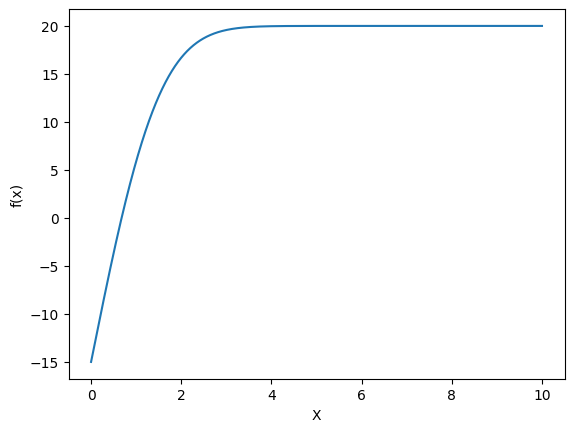

In [3]:
plt.plot(x11,f11(x11))
plt.xlabel('X')
plt.ylabel("f(x)")

<h4>b)

In [4]:
depth, error = bisection(f11,0,10,1e-13)
print('depth = ', depth)

depth =  0.6769618544819167


This makes sense, as our graph is also roughly showing that point as a zero.

<h4>c)

In [5]:
newton.newton_method(f11,df11,0.01,1e-13,100)

Newton method converged succesfully, niter=15, nfun=32, f(r)=3.4e-13


(0.6769618544819533,
 array([0.01      , 0.72371999, 0.67034388, 0.67779986, 0.67685408,
        0.67697569, 0.67696008, 0.67696208, 0.67696183, 0.67696186,
        0.67696185, 0.67696185, 0.67696185, 0.67696185, 0.67696185,
        0.67696185]),
 32)

Converges succesfully.

In [6]:
print(df11(10))

1.3770983942531758e-14


In [7]:
newton.newton_method(f11,df11,10,1e-13,100)

(10, array([10]), 2)

Here the function breaks as $\frac{df}{dx}<1*10^{-13}$

<h3>Problem 2

<h4>a)

<h3>Problem 4

<h4>i)Newtons's

In [8]:
x4 = np.linspace(3,5,1000)
f4 = lambda x: np.exp(3*x)-27*x**6+27*x**4*np.exp(x)-9*x**2*np.exp(2*x)
df4 = lambda x: 3*np.exp(3*x)-27*6*x**5+27*4*x**3*np.exp(x)+27*x**4*np.exp(x)-18*x*np.exp(2*x)-9*2*x**2*np.exp(2*x)

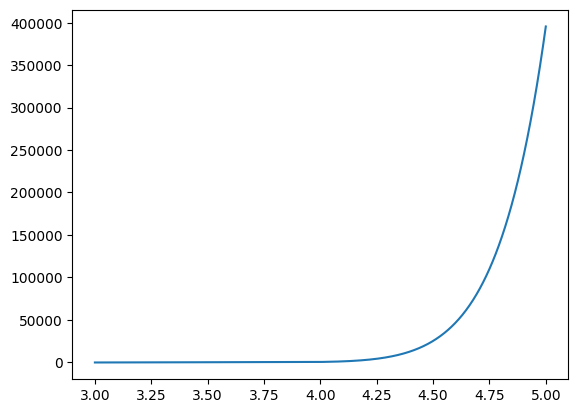

In [9]:
plt.plot(x4,f4(x4))

In [10]:
newton.newton_method(f4,df4,4,1e-13,1000)

Newton method converged succesfully, niter=50, nfun=102, f(r)=0.0e+00


(3.733060006927688,
 array([4.        , 3.92812038, 3.87280282, 3.83145651, 3.80135832,
        3.77993501, 3.76495935, 3.75463482, 3.74758922, 3.74281624,
        3.73959936, 3.7374389 , 3.73599143, 3.73502323, 3.73437632,
        3.73394441, 3.73365618, 3.7334639 , 3.73333563, 3.73325007,
        3.73319315, 3.73315506, 3.73312959, 3.73311247, 3.7331018 ,
        3.73309412, 3.73308246, 3.73319502, 3.73315648, 3.73313039,
        3.73311279, 3.73310465, 3.7330905 , 3.73308042, 3.73239736,
        3.73262473, 3.73277622, 3.73287718, 3.73294441, 3.73298917,
        3.73301876, 3.73303886, 3.73305202, 3.73306656, 3.7330751 ,
        3.73316115, 3.733134  , 3.73311556, 3.73310463, 3.73309046,
        3.73306001]),
 102)

In [11]:
secant.secant_method(f4,3,5,1e-13,1000)

Secant method converged succesfully, niter=38, nfun=40, f(r)=0.0e+00


(3.733066621214533,
 array([5.        , 3.00166963, 3.00333534, 4.08841815, 3.30462432,
        3.43336334, 3.56200094, 3.60936402, 3.64544772, 3.66884354,
        3.68582134, 3.69799039, 3.70692778, 3.71351725, 3.71841327,
        3.72206413, 3.72479567, 3.72684385, 3.72838227, 3.72953923,
        3.73041014, 3.73106617, 3.73156061, 3.7319334 , 3.73221455,
        3.73242665, 3.73258667, 3.73270742, 3.73279855, 3.73286728,
        3.73291928, 3.73295827, 3.73298798, 3.73301018, 3.73302793,
        3.73304001, 3.73304749, 3.73305945, 3.73306662]),
 40)

In [12]:
newton.mod_newton_method(f4,df4,4,1e-13,1000)

287.2543140879716
287.2543140879716
Newton method converged succesfully, niter=50, nfun=102, f(r)=0.0e+00


RecursionError: maximum recursion depth exceeded